**Projeto da disciplina de Data Mining**

**PESC - Programa de Engenharia de Sistemas e Computação**

**COPPE / UFRJ**

Autores: Bernardo Souza e Rafael Lopes Conde dos Reis

GitHub: https://github.com/condereis/credit-card-default/


# Resumo



# Pacotes Utilizados

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Análise Inicial

Este projeto utiliza a base de dados "Default of Credit Card Clients Dataset" disponibilizada pela UCI Machine Learning no site do Kaggle. "Default of Credit Card Clients Dataset" apresenta as informações de clientes de cartão de crédito e de seus pagamentos de fatura de cartão. Nela os clientes são clssificados em clientes que pagam uma fatura e clientes que atrazam ou dão calote em uma fatura do cartão de crédito.A cada entrada da base apresenta 25 variáveis. Abaixo é transcrita a descrição dada no Kaggle.

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [10]:
train = pd.read_csv('../data/interim/train.csv', index_col=0)
del train.index.name

train.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167253.619048      1.604952      1.855857      1.552667     35.503190   
std     129780.577500      0.488873      0.791843      0.522814      9.228798   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.014762     -0.126048     -0.161429     -0.218476     -0.264190   
std        1.115917      1.192652      1.187919      1.163021      1.127144   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               21000.000000   21000.000000   
mean              ...               43486.998619   40428.756143   
std               ...               64923.705508   61380.584634   
min               ...             -170000.000000  -81334.000000   
25%               ...                2303.000000    1762.750000   
50%               ...               19128.500000   18104.500000   
75%               ...               55180.250000   50152.250000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count   21000.000000   21000.000000  2.100000e+04   21000.000000   
mean    39016.284048    5626.162048  5.921240e+03    5197.440190   
std     59878.718183   16900.424260  2.209119e+04   17803.002497   
min   -209051.000000       0.000000  0.000000e+00       0.000000   
25%      1225.750000    1000.000000  8.360000e+02     390.000000   
50%     17143.500000    2100.000000  2.010000e+03    1800.000000   
75%     49311.750000    5005.000000  5.000000e+03    4434.250000   
max    961664.000000  873552.000000  1.227082e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default.payment.next.month  
count   21000.000000   21000.000000   21000.000000                21000.000000  
mean     4801.393095    4813.631476    5194.864476                    0.222429  
std     16209.299180   15537.652308   18015.660988                    0.415887  
min         0.000000       0.000000       0.000000                    0.000000  
25%       282.000000     234.000000     116.000000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4000.000000    4006.000000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 24 columns]

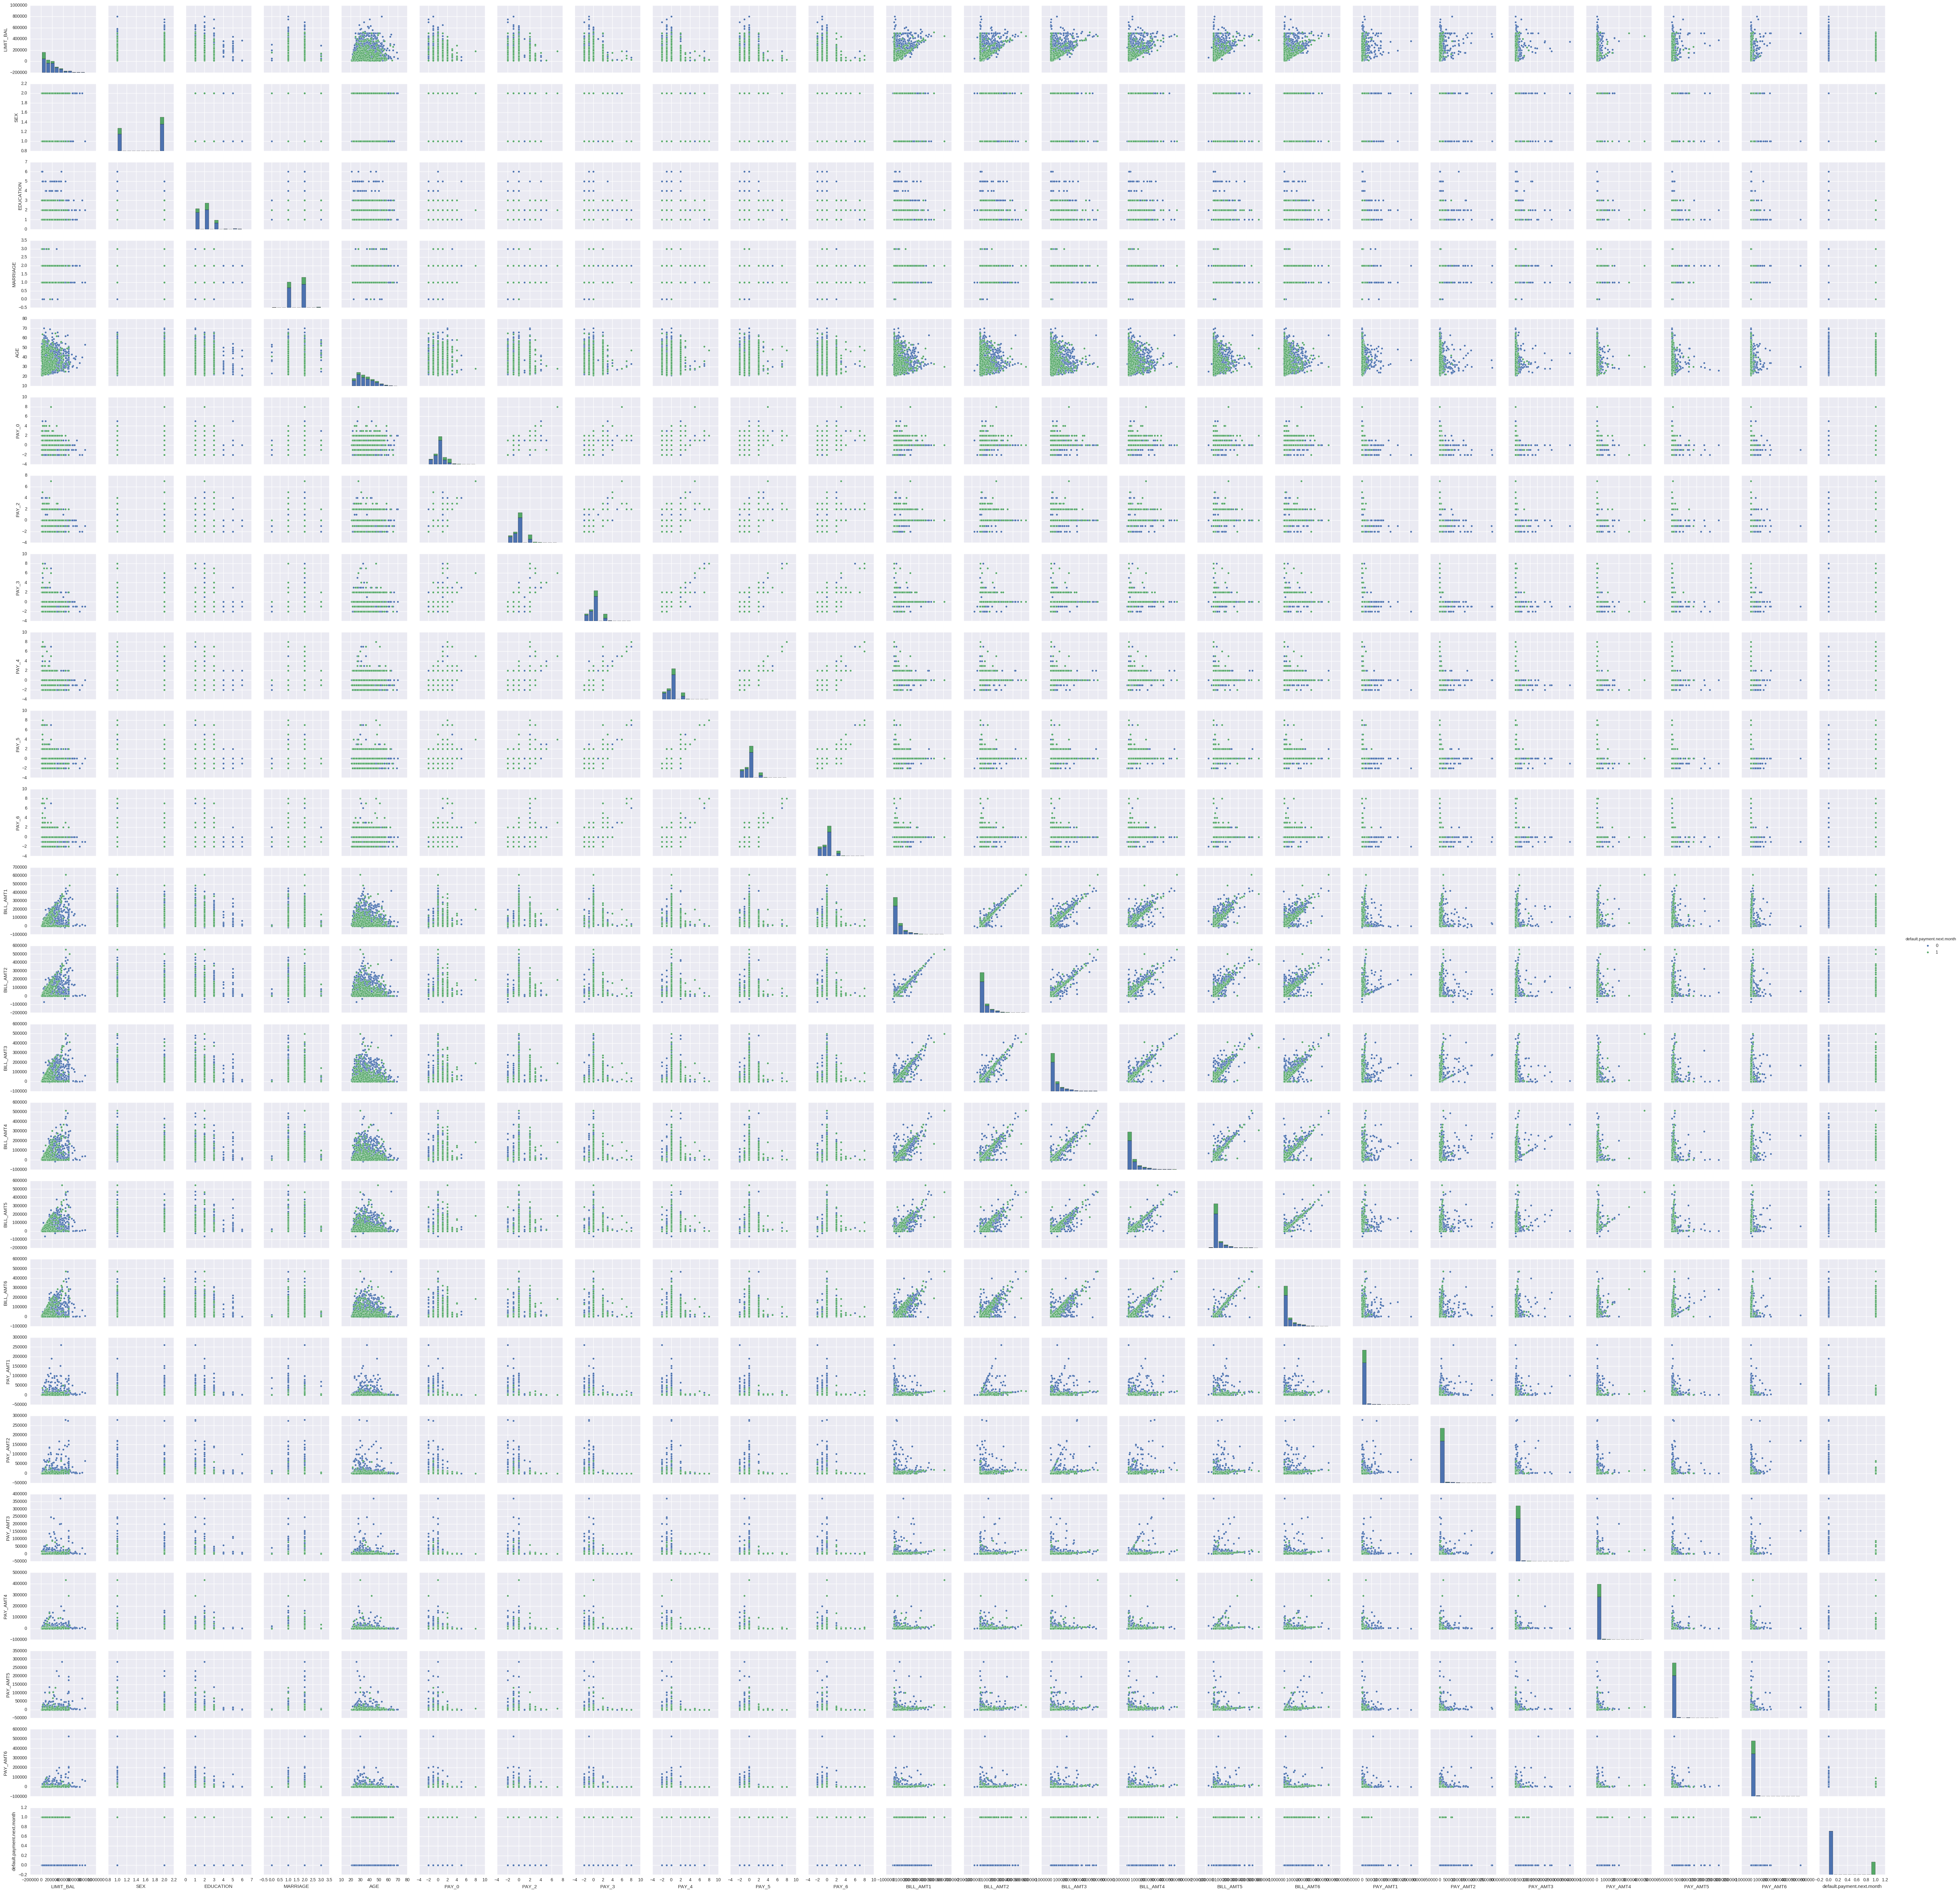

In [3]:
sns.pairplot(train.sample(frac=0.1), diag_kind="hist", hue='default.payment.next.month')

O pair plot acima mostra o plot de cada um dos atributos em relação ao outro e o histograma de cada atributo (isso ocm as classes ressaltadas nas cores). Pode-se observar que as classes apresentam grande sobreposição de valores, não havendo um valor óbvio entre quaisquer dois atributos que separe bem (mesmo que um subconjunto) os dados. Observou-se entretanto que os valores de classe 0 (não atraza pagamento) são mais esparços (apresentam mais outliers e pontos no mais distantes), isso não ajuda o problema de classificar clientes que atrazarão, mas permitiria identificar um subgrupo de clientes facilmente marcados como que não atrazam (o q poderia ser útil para o banco).

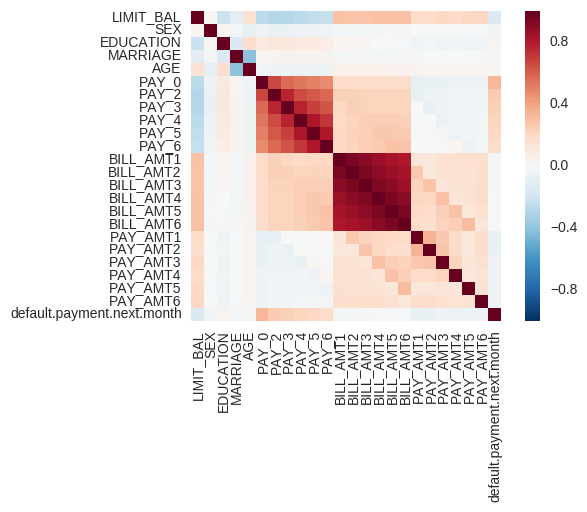

In [28]:
corrmat = train.corr()
sns.heatmap(corrmat, square=True)

O mapa de calor acima exibe a correlação entre as diversas variáveis da base. Podemos observar uma correlação forte, devido a dependencia tempora, entre o atraso no pagamento nos últimos 6 meses (PAY_0 a PAY_6), entre as variáveis das faturas do cartão nos últimos 6 meses (BILL_AMT1 a BILL_AMT6) e entre os pagamentos feitos nos últimos 6 meses (PAY_AMT1 a PAY_AMT6). Existe também forte correlação entre alguns desses grupos, como entre o atraso e a fatura e a fatura e o pagamento. Entre as variáveis casamento e idade também há forte correlação.

As variáveis mais correlacionadas com o pagamento ou não da próxima fatura são, respectivamente, o atraso no pagamento dos últimos meses e o limite do cartão. 

# Limite do Cartão

É possível observar, a partir dos plots abaixo, que a distribuição dos casos onde foi efetuado o pagamento possui um valor de crédito mais alto do que naqueles onde ouve default. Pode-se cogitar que valores mais altos de limite estão associados com menor risco de default no pagamento, uma vez que usualmente o lumite do cartão aumenta uma vez que o cliente se mostre comprometido com os pagamentos.

O primeiro é um boxplot, no qual podemos ver que a linha da mediana no caso de não pagamento se encontra abaixo da mediana no caso de pagamento. Isso é confirmado, a seguir pelos histogramas, onde o histograma de default se encontra acima do de pagamento para valores mais baixos de emprestimo e o oposto para valores mais altos. O ultimo mostra a taxa de não pagamento em cada quartil (separado por idade) de empréstimo. Este último mostra mais explicitamente a dependencia do valor do empréstimo na taxa de não pagamento.

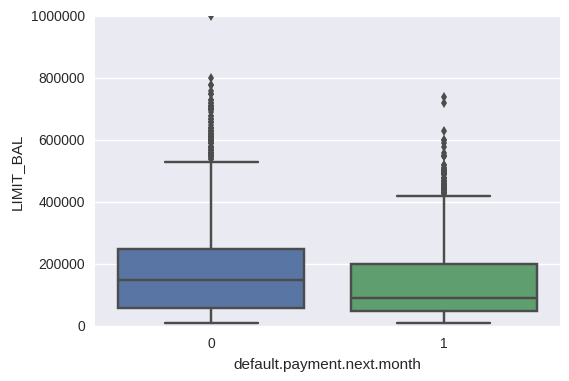

In [5]:
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=train);

In [6]:
sns.kdeplot(train[train['default.payment.next.month']==0].LIMIT_BAL, label='Pagamento')
sns.kdeplot(train[train['default.payment.next.month']==1].LIMIT_BAL, label='Default')

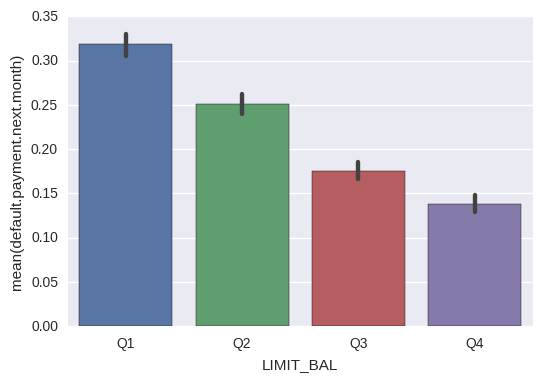

In [7]:
categorical_limit_bal = pd.cut(train.LIMIT_BAL, [0,50000,140000,240000,1000000], labels=["Q1","Q2","Q3","Q4"])
sns.barplot(x=categorical_limit_bal, y=train['default.payment.next.month']);

Por fim, converteu-se o valor de limite do cartão, de dólares de Taiwan, para Reais ([cotação do dia 04/12/2016 às 13:56](http://www.xe.com/currencyconverter/convert/?Amount=1&From=BRL&To=TWD)), a fim de obeter uma noção melhoror do poder aquisitivo da base de usuarios. A descrição estatística do limite do cartão em reais mostra que apenas em torno de 1/4 das pessoas tem um limite entre, R\$1000 e R\$5500, ou seja, 2/3 da base tem limites superiores a R\$5500. Isso pode parecer um limite muito alto, mas se for normalizado pela relação entre o salário médio no [Brasil](http://www.worldsalaries.org/brazil.shtml) e em [Taiwan](http://www.worldsalaries.org/taiwan.shtml), obtemos a sequinte distribuição estatística, muito mais próxima do que se esperaria de uma base que contenha todas as faixas de poder aquisitivo.

In [5]:
(train.LIMIT_BAL/(9.17696 * 2.9975)).describe()

count    21000.000000
mean      6080.194796
std       4717.931943
min        363.531434
25%       1817.657170
50%       5089.440075
75%       8724.754414
max      36353.143392
Name: LIMIT_BAL, dtype: float64

# Atraso no pagamento

É possível observar algo estranho nos dados PAY_x. Segundo a descrição do problema ela deveria ter apenas valores maiores que 1 referentes ao atraso e caso não tivesse havido atraso o valor da variável seria -1. Podemos observar os valores -2 e 0 nos dados, que, a princípio não eram esperados. 

Como foi observado no gráfico de correlação entre variáveis notamos que as variáveis PAY_0 - PAY_6 são fortemente correlacionadas entre sí, portando analisamos abaixo apenas PAY_0 que, dentre elas, é a mais correlacionada com a saída.

Observamos que os valores -2 a 0 tem uma taxa de default muito menor do que dos demais valores. Como era possível esperar pessoas que com um grande atraso no pagamento tem uma taxa muita maior de default no próximo mês do que aquelas que tem os pagamentos em dia. A distribuição para os valores de atraso mostra que 0 é o valor mais frequente.

In [8]:
sns.barplot(x='PAY_0', y='default.payment.next.month', data=train);

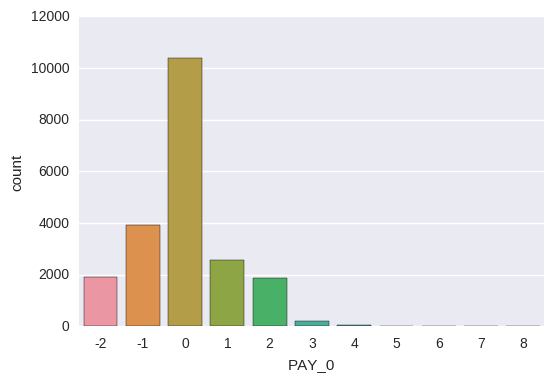

In [9]:
sns.countplot(x=train.PAY_0);

# Escolaridade

Observamos no plot abaixo que university, graduate e high school são as classes mais representativas, respectivamente. Já o plote sequinte mostra que o valor médio da ocorrência de pagamento para cada categoria de escolaridade. Podemos observar que a taxa de ocorrencia de default é menor quento maior o grau de escolaridade.

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


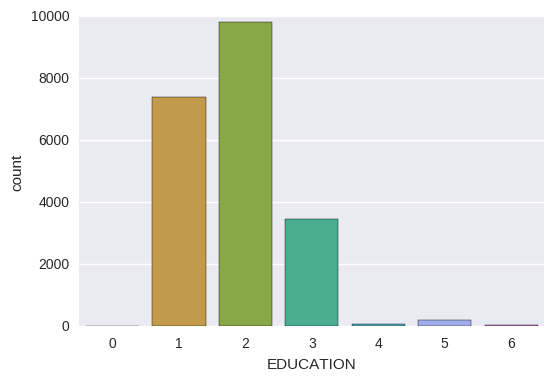

In [10]:
sns.countplot(train.EDUCATION)
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


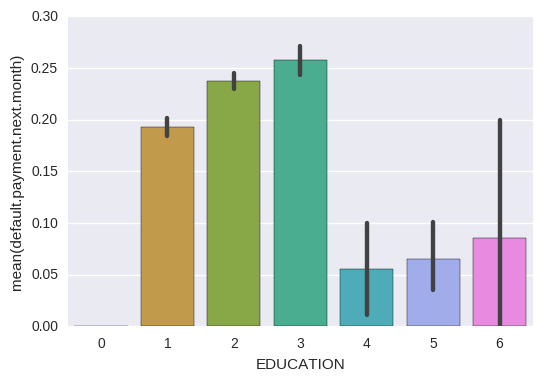

In [11]:
sns.barplot(x='EDUCATION', y='default.payment.next.month', data=train);
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

# Idade

A diferença da taxa de não pagamento para diferentes idades é pequena, porém, é possível notar ao segmentar pelos quartis, que os mais jovens e os mais velhos, possuem uma taxa de default maior que as idades intermediárias. Esta diferença pode chegar a quase 5 pontos percentuais.

In [14]:
# sns.lmplot(x="size", y="default.payment.next.month", data=train);
sns.kdeplot(train[train['default.payment.next.month']==0].AGE, label='Pagamento')
sns.kdeplot(train[train['default.payment.next.month']==1].AGE, label='Default')

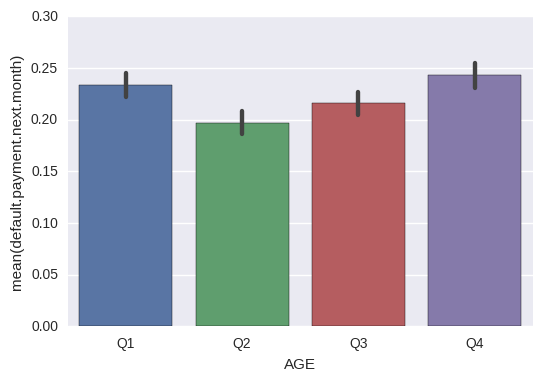

In [18]:
categorical_age = pd.cut(train.AGE, [21, 28, 34, 41, 79], labels=["Q1","Q2","Q3","Q4"])
sns.barplot(x=categorical_age, y=train['default.payment.next.month']);

# Gênero

A diferença por gênero foi de aproximadamente 3 pontos percentuais, onde mulheres apresentam menor taxa de default que homens.

In [19]:
sex = train.SEX.replace(1,'Masculino').replace(2,'Feminino')
sns.barplot(x=sex, y=train['default.payment.next.month'])

# Estado Civil

Pode-se observar uma diferença entre a taxa de pagamento de não casados (solteiros e outros) e casados, especialemnte ao sequmentar os dados nos quartis de faixa etária. Jovens (primeiro quartil) solteiros tem uma taxa de default média aproximadamente 8 pontos percentuais mais alta do que a de casados entre 28 e 34 anos (segundo quartil).

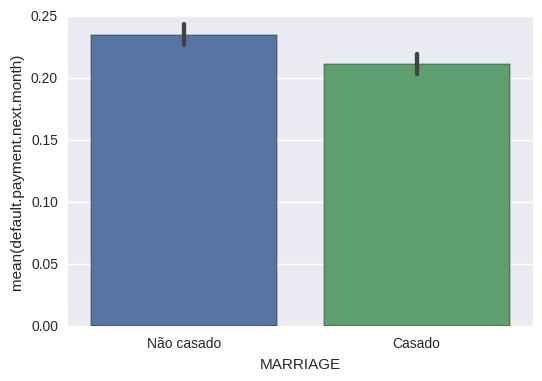

In [13]:
marrige = train.MARRIAGE.replace(0,u'Não casado')
marrige = marrige.replace(1,u'Não casado')
marrige = marrige.replace(3,u'Não casado')
marrige = marrige.replace(2,'Casado')
sns.barplot(x=marrige, y=train['default.payment.next.month'])

In [20]:
sns.barplot(x=marrige, y=train['default.payment.next.month'], hue=categorical_age)

# Últimas Contas e Pagamentos

Como já pode ser visto as variáveis de pagamento de fatura e valor da conta tem uma forte correlação temporal entre si, o pagamento de um dado mês apresenta grande correlação com a fatura dos meses anteriores, já correlação baixa com a fatura de meses futuros.

In [19]:
corrmat = train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Tentou-se subtrair o valor pago do valor da fatura, a fim de reduzir o número de variáveis. Essas passam a indicar o valor que ficou em dívida da fatura do mês. Após esta redução, pode-se observar, que as variáveis encontradas tem uma correlação temporal ainda mais forte.

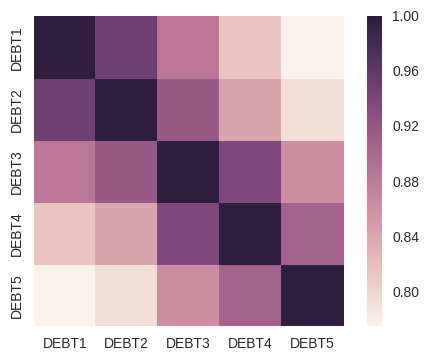

In [20]:
train['DEBT1'] = train.PAY_AMT1 - train.BILL_AMT2
train['DEBT2'] = train.PAY_AMT2 - train.BILL_AMT3
train['DEBT3'] = train.PAY_AMT3 - train.BILL_AMT4
train['DEBT4'] = train.PAY_AMT4 - train.BILL_AMT5
train['DEBT5'] = train.PAY_AMT5 - train.BILL_AMT6
# train['PAY_AMT6'] = train.PAY_AMT6 - train.BILL_AMT7
corrmat = train[['DEBT1', 'DEBT2', 'DEBT3', 'DEBT4', 'DEBT5']].sample(frac=0.1).corr()
sns.heatmap(corrmat, square=True)

Por fim o conjunto das 6 variáveis de fatura e 6 de pagamento foram reduzidas para apenas uma, o saldo médio dos últimos meses. Ao relaciona-la com o limite do cartão obtemos as seguintes distribuições. Observamos que aqueles que pagaram a fatura seguinte tem um saldo médio, mais concentrado em 0. A concentração próxima a -1, ou seja um saldo negativo igual ao limite do cartão, é maior para o caso de default.

In [21]:
a = (train.PAY_AMT1+train.PAY_AMT2+train.PAY_AMT3+train.PAY_AMT4+train.PAY_AMT5+train.PAY_AMT6)
b = (train.BILL_AMT2+train.BILL_AMT3+train.BILL_AMT4+train.BILL_AMT5+train.BILL_AMT6)
train['percent_debt'] = (a-b)/train.LIMIT_BAL
sns.violinplot(y=train['percent_debt'], x=train['default.payment.next.month'])